<a href="https://colab.research.google.com/github/sin2akshay/External-Internship-Program-2.0-Machine-Learning-for-Deep-Neural-Networks/blob/master/Session%201/Assignment_1A_1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


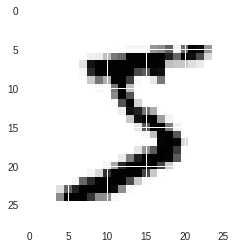

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 10))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  


In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 10)        650       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 1, 10)          10010     
_________________________________________________________________
flatten_2 (Flatten)          (None, 10)                0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [23]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 18s 292us/step - loss: 0.1489 - acc: 0.9547
Epoch 2/10
60000/60000 [==============================] - 17s 287us/step - loss: 0.0534 - acc: 0.9835
Epoch 3/10
60000/60000 [==============================] - 17s 281us/step - loss: 0.0378 - acc: 0.9882
Epoch 4/10
60000/60000 [==============================] - 17s 281us/step - loss: 0.0322 - acc: 0.9897
Epoch 5/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.0256 - acc: 0.9916
Epoch 6/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.0215 - acc: 0.9933
Epoch 7/10
60000/60000 [==============================] - 17s 282us/step - loss: 0.0195 - acc: 0.9935
Epoch 8/10
60000/60000 [==============================] - 17s 278us/step - loss: 0.0150 - acc: 0.9951
Epoch 9/10
60000/60000 [==============================] - 17s 277us/step - loss: 0.0132 - acc: 0.9953
Epoch 10/10
60000/60000 [==============================] - 17s 277us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [25]:
print(score)

[0.035628675013029534, 0.9904]


In [0]:
y_pred = model.predict(X_test)

In [27]:
print(y_pred[:9])
print(y_test[:9])

[[8.56856941e-17 2.80292070e-16 3.98647920e-10 2.26313301e-10
  4.29670697e-20 1.09167351e-14 4.32297228e-23 1.00000000e+00
  1.63193687e-14 3.42581241e-11]
 [3.67280398e-14 2.49309101e-10 1.00000000e+00 1.04129806e-19
  4.36802635e-16 1.29457540e-22 6.64253808e-14 1.92267320e-16
  3.28224018e-15 3.36425373e-17]
 [1.38229740e-11 9.99999166e-01 5.33304728e-07 6.00467213e-13
  1.33074920e-07 8.23288033e-08 5.94874638e-09 1.86537122e-07
  1.46605457e-08 1.30854633e-10]
 [9.99999523e-01 2.37068784e-14 3.23042258e-07 2.10454077e-13
  5.51922614e-12 3.34516928e-11 1.20121115e-07 2.19781103e-11
  2.68145554e-12 3.02333403e-09]
 [2.58333429e-16 3.33548944e-13 1.35672897e-11 6.88721894e-17
  1.00000000e+00 1.74295485e-19 2.12279592e-17 5.28269716e-14
  5.51931059e-13 1.29145361e-10]
 [2.67691078e-11 9.99990821e-01 1.02498927e-06 4.59020788e-13
  8.52505408e-08 2.54136212e-10 2.18699069e-11 8.07677861e-06
  3.95242061e-09 7.41573358e-10]
 [1.51129316e-22 2.86678016e-12 6.33199326e-11 1.37932251e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

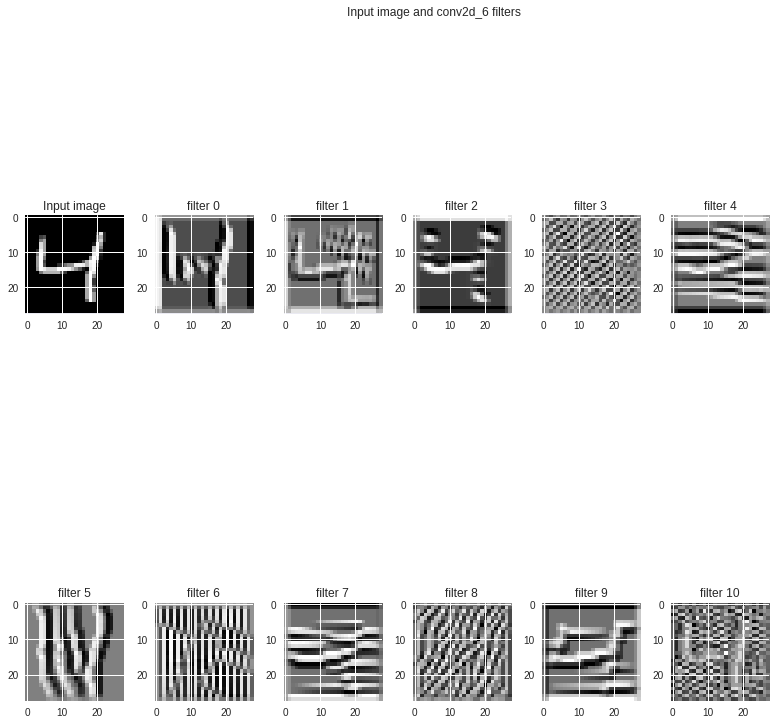

In [30]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_6'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()